# Choose your own algorithm
Selecting adaboost to run a classifier on the terrain data

In [1]:
# Initial imports and creating of data
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

In [2]:
%matplotlib inline

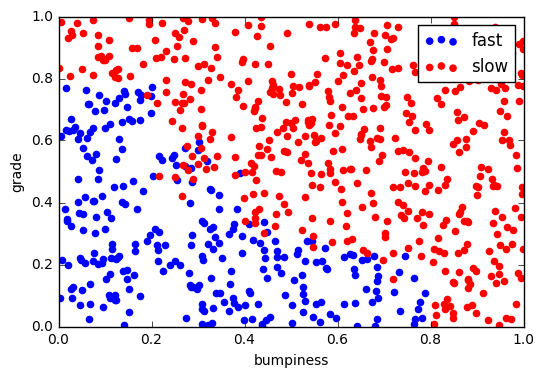

In [3]:
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [17]:
# Trying out different number of estimators, best accuracy I can get is 92.8%
clf = AdaBoostClassifier(n_estimators=24)
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
print accuracy_score(pred, labels_test)

0.928


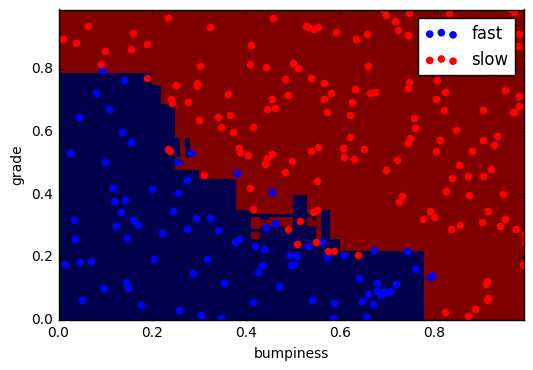

In [5]:
# Using the supplied prettyPicture function to show the decision boundary and how well it performs with test data
prettyPicture(clf, features_test, labels_test)